In [43]:
import os
os.add_dll_directory('C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/bin')

<AddedDllDirectory('C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/bin')>

In [44]:
import pandas as pd
import numpy as np

In [45]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [46]:
df = pd.read_csv('./BTC-USD.csv', names=['time', 'low', 'high', 'open', 'close', 'volume'])
X = df.iloc[:, -2].values

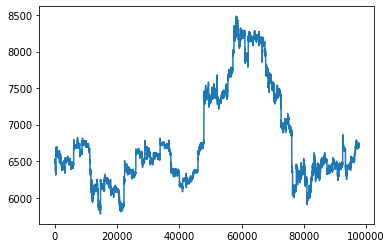

In [47]:
import matplotlib.pyplot as plt

plt.plot(X)
plt.show()

In [48]:
X = X.reshape(-1, 1)
X.shape

(97724, 1)

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
train_size = int(len(X) * 0.65)
print(train_size)
test_size = int(len(X) - train_size)
print(test_size)
X_train = X[:train_size, ]
X_test = X[train_size:, :]
time_stamp = 60
X_test.shape

63520
34204


(34204, 1)

In [50]:
print(test_size, train_size)
print(int(test_size / time_stamp) * time_stamp, int(train_size / time_stamp) * time_stamp)

34204 63520
34200 63480


In [51]:
def PreprocessRNNSequence(Arr, size):
    Sequence = []
    TimeStamps = []
    Y_true = []
    for j in range(0, int(size / time_stamp)):
        for i in range(j, j + time_stamp + 1):
            if (i == j + time_stamp):
                Y_true.append(Arr[i])
                Sequence.append(TimeStamps)
                TimeStamps = []
            else:
                TimeStamps.append(Arr[i])     
    Sequence = np.array(Sequence)
    Y_true = np.array(Y_true).reshape(-1, 1)
    return (Sequence, Y_true)

X_train, y_train = PreprocessRNNSequence(X_train, train_size)
print(X_train.shape, y_train.shape)
X_test, y_test = PreprocessRNNSequence(X_test, test_size)
print(X_test.shape, y_test.shape)
InvTransformed = scaler.inverse_transform(y_test)

(1058, 60, 1) (1058, 1)
(570, 60, 1) (570, 1)


In [52]:
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

rnn = Sequential()
rnn.add(LSTM(units=100, return_sequences=True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units=100, return_sequences=False))
rnn.add(Dense(units=1))
opt = Adam(learning_rate=1e-3)
rnn.compile(loss='mse', optimizer=opt)

In [53]:
r = rnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
34/34 [==============================] - 6s 22ms/step - loss: 0.0061
Epoch 2/20
34/34 [==============================] - 1s 17ms/step - loss: 3.2235e-04
Epoch 3/20
34/34 [==============================] - 1s 18ms/step - loss: 2.2267e-04
Epoch 4/20
34/34 [==============================] - 1s 17ms/step - loss: 1.5054e-04
Epoch 5/20
34/34 [==============================] - 1s 17ms/step - loss: 1.1266e-04
Epoch 6/20
34/34 [==============================] - 1s 17ms/step - loss: 8.4626e-05
Epoch 7/20
34/34 [==============================] - 1s 17ms/step - loss: 7.4313e-05
Epoch 8/20
34/34 [==============================] - 1s 17ms/step - loss: 6.4620e-05
Epoch 9/20
34/34 [==============================] - 1s 17ms/step - loss: 6.6287e-05
Epoch 10/20
34/34 [==============================] - 1s 17ms/step - loss: 8.3172e-05
Epoch 11/20
34/34 [==============================] - 1s 18ms/step - loss: 6.7008e-05
Epoch 12/20
34/34 [==============================] - 1s 17ms/step - loss: 6.62

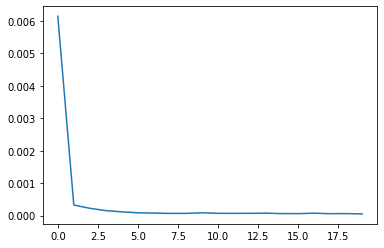

In [54]:
plt.plot(r.history['loss'])
plt.show()

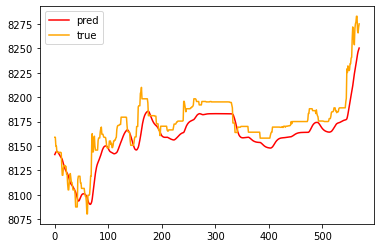

In [55]:
y_pred = rnn.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

plt.plot(y_pred, color='red', label='pred')
plt.plot(InvTransformed, color='orange', label='true')
plt.legend()

In [ ]:
rnn.save('crypto-pred.h5')